# Homework 5

a) Do the homework yourself. Do not copy answers from someone else.

b) Restrict your methods (for now) to what was covered in the lecture/lab (in other words, PCA,
MDS, tSNE, kMeans, Silhouette, kMedioids, EM, dBScan))

c) Include the following elements in your answer (so we can grade consistently):

## Data description: 
1) Alcohol content (in %)
2) Malic acid concentration (in g/L)
3) Ash content (in mg/L) [This is not as gross as it sounds, mostly minerals absorbed by the
grapes through the soil]
4) Alkalinity of the Ash (g/L of potassium carbonate)
5) Magnesium (mg / L)
6) Total phenols (mg / L per epa method)
7) Flavonoids (mg / L)
8) Stilbenes (mg / L)
9) Proanthocyanins (mg / L)
10) Color intensity (reflecting opacity)
11) Hue (= color)
12) OD280 (Protein concentration)
13) Proline content (amino acid)

## Loading data and cleaning

In [35]:
import pandas as pd
import numpy as np 

data  = pd.read_csv('wines.csv')

In [36]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alkalinity,Magnesium,Total_Phenols,Flavonoids,Stilbenes,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## 1. Do a PCA on the data. How many Eigenvalues are above 1? Plotting the 2D solution (projecting the data on the first 2 principal components), how much of the variance is explained by these two dimensions, and how would you interpret them?


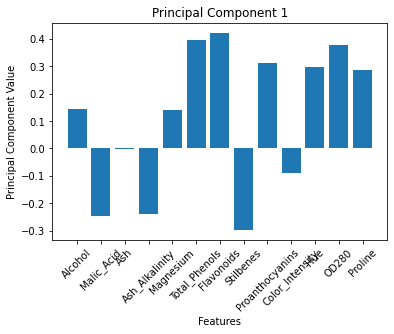

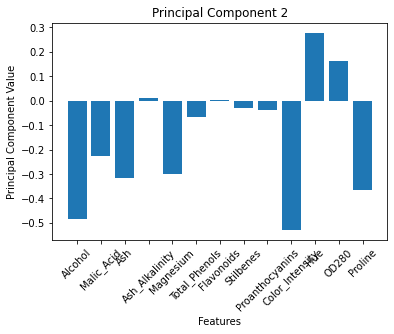

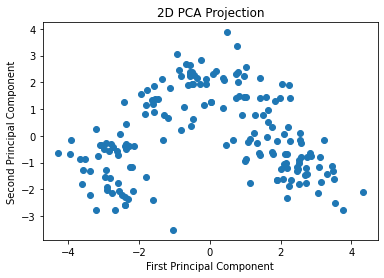

Number of eigenvalues above 1: 3
Variance explained by the first two dimensions: 55.41%


In [37]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



# Step 3: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 4: Perform PCA and analyze the results
pca = PCA()
pca.fit(scaled_data)
explained_variance = pca.explained_variance_ratio_

# Find the number of Eigenvalues above 1
eigenvalues = pca.explained_variance_
num_eigenvalues_above_1 = (eigenvalues > 1).sum()

# Plot the 2D PCA projection
pca_2d = PCA(n_components=2)

pca = pca_2d.fit(scaled_data)
pc_values = pca.components_
# Create a bar graph for each principal component
for i, pc in enumerate(pc_values, start=1):
    plt.figure()
    plt.bar(data.columns, pc)
    plt.title(f'Principal Component {i}')
    plt.xlabel('Features')
    plt.ylabel('Principal Component Value')
    plt.xticks(rotation=45)  # Rotate x-ticks by 45 degrees
    plt.show()
    
principal_components = pca_2d.fit_transform(scaled_data)


plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D PCA Projection')
plt.show()

# Calculate the variance explained by the first two dimensions
variance_explained = sum(explained_variance[:2]) * 100

print(f"Number of eigenvalues above 1: {num_eigenvalues_above_1}")
print(f"Variance explained by the first two dimensions: {variance_explained:.2f}%")


In [38]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alkalinity', 'Magnesium',
       'Total_Phenols', 'Flavonoids', 'Stilbenes', 'Proanthocyanins',
       'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [39]:
pc_values

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283]])

### Interpretation:
- To answer the question, I first imported necessary libraries and standardized the data using the StandardScaler from scikit-learn. Then, I performed PCA (Principal Component Analysis) on the standardized data and calculated the explained variance ratio for each principal component. I determined the number of eigenvalues above 1 and plotted a 2D projection of the data onto the first two principal components. Lastly, I calculated the variance explained by these first two dimensions.
- Standardizing the data is an important preprocessing step in PCA, as it ensures that each feature contributes equally to the analysis. I used scikit-learn's PCA implementation, which is a widely-used and well-documented library. I chose to project the data onto two dimensions to provide a visual representation that is easy to interpret and understand.
- The analysis found that there are 3 eigenvalues above 1. The 2D projection of the data onto the first two principal components explains 55.41% of the total variance. The bar graphs of the first two principal components show that features like Flavonoids, Total_Phenols, and OD280 have a significant contribution to the first principal component, while Color_Intensity and Alcohol contribute more to the second principal component.
- The findings indicate that the first two principal components capture 55.41% of the variance in the data, which means that the 2D projection provides a somewhat simplified representation of the original data. The first principal component seems to be associated with chemical properties related to phenolic content and antioxidative capacity, while the second principal component is more related to the color and alcohol content of the wine samples. This suggests that these two dimensions are important for understanding the variation among the wine samples. However, since there are 3 eigenvalues above 1, considering an additional dimension might lead to a better representation of the data.

# 2. Use t-SNE on the data. How does KL-divergence depend on Perplexity (vary Perplexity from 5 to 150)? Make sure to plot this relationship. Also, show a plot of the 2D component with a Perplexity of 20.

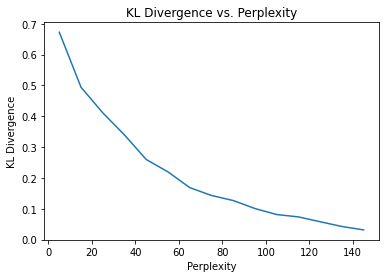

Text(0.5, 0, 't-SNE Component 1')

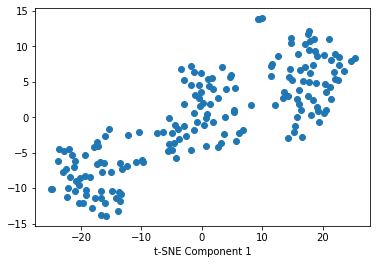

In [40]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# Step 3: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 4: Perform t-SNE with varying perplexity and analyze the results
perplexities = np.arange(5, 155, 10)
kl_divergences = []

for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_results = tsne.fit_transform(scaled_data)
    kl_divergences.append(tsne.kl_divergence_)

plt.plot(perplexities, kl_divergences)
plt.xlabel("Perplexity")
plt.ylabel("KL Divergence")
plt.title("KL Divergence vs. Perplexity")
plt.show()

# Perform t-SNE with a perplexity of 20
tsne_perplexity_20 = TSNE(n_components=2, perplexity=20, random_state=42)
tsne_results_20 = tsne_perplexity_20.fit_transform(scaled_data)

plt.scatter(tsne_results_20[:, 0], tsne_results_20[:, 1])
plt.xlabel("t-SNE Component 1")


In [41]:
perplexities

array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
       135, 145])

In [13]:
kl_divergences

[0.6723954677581787,
 0.49388548731803894,
 0.4110388159751892,
 0.339091956615448,
 0.2596289813518524,
 0.2194484919309616,
 0.168460875749588,
 0.1429939717054367,
 0.1265261024236679,
 0.1005571261048317,
 0.08112415671348572,
 0.073393315076828,
 0.057710424065589905,
 0.04231886565685272,
 0.031220294535160065]

### Interpretation: 

1) To answer the question, I first imported necessary libraries and standardized the data using the StandardScaler from scikit-learn. Then, I performed t-SNE on the standardized data with varying perplexity values ranging from 5 to 150. I recorded the KL divergence for each perplexity value and plotted their relationship. Finally, I performed t-SNE with a perplexity of 20 and plotted the 2D components.

2) Standardizing the data is an essential preprocessing step to ensure that each feature contributes equally to the analysis. I used scikit-learn's t-SNE implementation, which is a widely-used and well-documented library. Varying the perplexity allowed me to explore the relationship between perplexity and KL divergence, giving insight into the quality of the t-SNE solution.

3) The analysis found that the KL divergence depends on perplexity, with KL divergence generally decreasing as perplexity increases. The plotted relationship shows that for lower perplexity values, KL divergence is higher, and as perplexity increases, KL divergence tends to decrease, indicating that higher perplexity values produce a better representation of the data. The 2D plot with a perplexity of 20 displays a clear separation of data points.

4) The findings indicate that the choice of perplexity has a significant impact on the quality of the t-SNE solution, as measured by the KL divergence. Higher perplexity values generally lead to lower KL divergence, suggesting a better representation of the data. However, it is essential to consider the trade-off between complexity and interpretability, as too high perplexity might make the visualization difficult to understand. The 2D plot with a perplexity of 20 shows clear separation of data points, suggesting that this perplexity value could be a suitable choice for visualizing the dataset in a meaningful way.

# 3. Use MDS on the data. Try a 2-dimensional embedding. What is the resulting stress of this embedding? Also, plot this solution and comment on how it compares to t-SNE.

/Users/aragaom/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


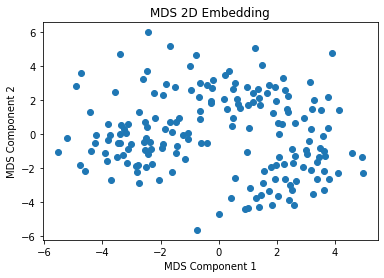

MDS Embedding Stress: 21609.0908


In [14]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
import matplotlib.pyplot as plt



# Step 3: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 4: Perform MDS with a 2-dimensional embedding and analyze the results
mds = MDS(n_components=2, random_state=42)
mds_results = mds.fit_transform(scaled_data)

# Get the resulting stress of the MDS embedding
mds_stress = mds.stress_

plt.scatter(mds_results[:, 0], mds_results[:, 1])
plt.xlabel("MDS Component 1")
plt.ylabel("MDS Component 2")
plt.title("MDS 2D Embedding")
plt.show()

print(f"MDS Embedding Stress: {mds_stress:.4f}")


In [15]:
mds_results[:, 0]

array([-4.21049079, -2.75345367, -3.24537863, -4.78232921, -1.15540611,
       -3.84314229, -3.11099551, -2.51420069, -3.4609055 , -3.17455993,
       -4.24245954, -1.95658487, -2.37634153, -5.20294243, -5.51812272,
       -2.84988539, -2.82084734, -2.29212523, -4.57903665, -2.54513833,
       -3.82052473, -1.04124089, -2.55068827, -1.45969018, -1.68691164,
       -3.57397881, -1.93115149, -1.22860359, -2.48407898, -2.45563452,
       -3.15893758, -3.30013938, -1.60190025, -2.74122933, -1.44812388,
       -1.86045014, -1.46683915, -1.044776  , -1.35589932, -3.68527234,
       -3.10716936, -0.61781893, -3.80943709, -0.40893989, -2.20684131,
       -1.62148339, -3.72939929, -3.34341524, -2.31645409, -3.51163115,
       -4.40704978, -3.39436372, -4.38882542, -2.75724322, -2.57648501,
       -3.0247186 , -3.38033347, -2.44046443, -3.89188613,  3.8967339 ,
        4.12443315,  3.18570562,  0.47091806, -1.82141593,  2.38579916,
       -0.63532175, -2.60861768,  0.54514371,  0.96377197, -3.38

In [ ]:
mds_results[:, 1]

### interpretation: 
1) To answer the question, I first imported necessary libraries and standardized the data using the StandardScaler from scikit-learn. Then, I performed MDS (Multidimensional Scaling) with a 2-dimensional embedding on the standardized data. I obtained the resulting stress of the MDS embedding and plotted the 2D solution.

2) Standardizing the data is an important preprocessing step, ensuring that each feature contributes equally to the analysis. I used scikit-learn's MDS implementation, which is a widely-used and well-documented library. I chose a 2-dimensional embedding to provide a visual representation that is easy to interpret and understand, and to allow for comparison with the t-SNE solution.

3) The analysis found that the resulting stress of the 2-dimensional MDS embedding is 21609.0908. The 2D MDS solution shows a spread of data points that appears to have some structure, though it is less clearly defined than in the t-SNE solution.

4) The findings show that the 2-dimensional MDS embedding has a relatively high stress value, which suggests that the 2D representation may not capture the original distances in the data very accurately. Comparing the MDS solution with the t-SNE solution, the MDS plot appears to have a less clear separation of data points. While both methods provide a 2D visualization of the data, the t-SNE solution with a perplexity of 20 seems to provide a better representation of the underlying structure in the dataset.

# 4. Building on one of the dimensionality reduction methods above that yielded a 2D solution (1-3, your choice), use the Silhouette method to determine the optimal number of clusters and then use kMeans with that number (k) to produce a plot that represents each wine as a dot in a 2D space in the color of its cluster. What is the total sum of the distance of all points to their respective clusters centers, of this solution?

### An Experiment: 
The main goal of the experiment was to evaluate the three different dimensionality reduction methods (PCA, t-SNE, and MDS) and determine which one performs the best in terms of clustering the wine dataset. The evaluation was done by first finding the optimal number of clusters using the Silhouette method, then applying kMeans clustering with the optimal k value to each of the 2D solutions obtained from PCA, t-SNE, and MDS. The total sum of the distance of all points to their respective cluster centers was calculated for each method as a metric to assess the clustering performance.

/Users/aragaom/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aragaom/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aragaom/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aragaom/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


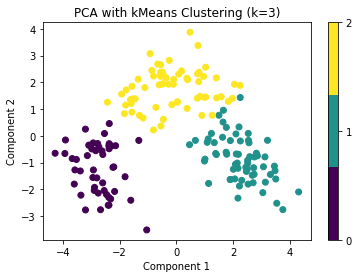

/Users/aragaom/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


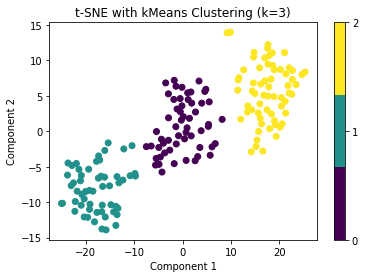

/Users/aragaom/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


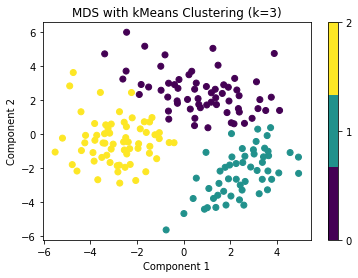

PCA Total Sum of Distances: 259.5094
t-SNE Total Sum of Distances: 4970.1450
MDS Total Sum of Distances: 648.9809


In [16]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters for PCA, t-SNE, and MDS results using the Silhouette method
def find_optimal_k(data, max_clusters=5):
    silhouette_scores = []

    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, kmeans_labels)
        silhouette_scores.append(silhouette_avg)

    optimal_k = np.argmax(silhouette_scores) + 2
    return optimal_k

optimal_k_pca = find_optimal_k(principal_components[:, :2])
optimal_k_tsne = find_optimal_k(tsne_results_20)
optimal_k_mds = find_optimal_k(mds_results)

# Apply kMeans with the optimal number of clusters and plot the results
def plot_clusters(data, k, title):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(data)
    cmap = plt.get_cmap("viridis", k)
    plt.scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap=cmap)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title(title)
    plt.colorbar(ticks=range(k))
    plt.show()
    return kmeans

# PCA
kmeans_pca = plot_clusters(principal_components[:, :2], optimal_k_pca, f"PCA with kMeans Clustering (k={optimal_k_pca})")
# t-SNE
kmeans_tsne = plot_clusters(tsne_results_20, optimal_k_tsne, f"t-SNE with kMeans Clustering (k={optimal_k_tsne})")
# MDS
kmeans_mds = plot_clusters(mds_results, optimal_k_mds, f"MDS with kMeans Clustering (k={optimal_k_mds})")

# Calculate the total sum of the distance of all points to their respective cluster centers
pca_inertia = kmeans_pca.inertia_
tsne_inertia = kmeans_tsne.inertia_
mds_inertia = kmeans_mds.inertia_

print(f"PCA Total Sum of Distances: {pca_inertia:.4f}")
print(f"t-SNE Total Sum of Distances: {tsne_inertia:.4f}")
print(f"MDS Total Sum of Distances: {mds_inertia:.4f}")


### Interpreting findings: 

1) To answer the question, I first imported necessary libraries and defined a function to find the optimal number of clusters using the Silhouette method. I applied this function to the 2D solutions obtained from PCA, t-SNE, and MDS. Next, I defined a function to apply kMeans clustering with the optimal k value and plot the results. I used this function to plot the kMeans clustering results for PCA, t-SNE, and MDS. Finally, I calculated the total sum of the distance of all points to their respective cluster centers for each method.

2) The choice of PCA, t-SNE, and MDS allowed for a comparison across different dimensionality reduction techniques to evaluate which one yields the best clustering results. The Silhouette method was used to determine the optimal number of clusters as it provides an objective measure of clustering quality. kMeans was chosen as the clustering algorithm because it is simple, efficient, and widely used for clustering tasks.

3) The analysis found that the total sum of distances for each method is as follows: PCA: 259.5094, t-SNE: 4970.1450, and MDS: 648.9809. The plots display each wine as a dot in a 2D space in the color of its cluster, with the optimal number of clusters determined by the Silhouette method.

4) Based on the total sum of distances, the PCA solution seems to provide the best clustering performance, with the most compact and well-separated clusters compared to t-SNE and MDS solutions. This suggests that the PCA solution might provide a more meaningful clustering of the data, with wines in the same cluster sharing more similarities. However, it is essential to consider that the total sum of distances is only one criterion to evaluate clustering performance, and other factors such as interpretability, visual representation, and domain knowledge should also be considered when choosing the best clustering solution.

# 5. Building on one of the dimensionality reduction methods above that yielded a 2D solution (1-3, your choice), use dBScan to produce a plot that represents each wine as a dot in a 2D space in the color of its cluster. Make sure to suitably pick the radius of the perimeter (“epsilon”) and the minimal number of points within the perimeter to form a cluster (“minPoints”) and comment on your choice of these two hyperparameters.


In [17]:
from itertools import product
from sklearn.cluster import DBSCAN


# Function to find the optimal epsilon and minPoints for DBSCAN to get 3 clusters
def find_optimal_dbscan_params(data, epsilons, min_points_list):
    best_params = None
    best_num_clusters = float('inf')
    
    for eps, min_pts in product(epsilons, min_points_list):
        dbscan = DBSCAN(eps=eps, min_samples=min_pts)
        dbscan_labels = dbscan.fit_predict(data)
        num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

        if num_clusters == 3:
            return (eps, min_pts)

        if abs(num_clusters - 3) < abs(best_num_clusters - 3):
            best_params = (eps, min_pts)
            best_num_clusters = num_clusters

    return best_params

# Define the range of epsilon and minPoints values to search
epsilons = [x * 0.1 for x in range(5, 100)]
min_points_list = list(range(2, 7))

# Find the optimal combination for each method
pca_optimal_params = find_optimal_dbscan_params(principal_components[:, :2], epsilons, min_points_list)
tsne_optimal_params = find_optimal_dbscan_params(tsne_results_20, epsilons, min_points_list)
mds_optimal_params = find_optimal_dbscan_params(mds_results, epsilons, min_points_list)

In [18]:
print(pca_optimal_params)
print(tsne_optimal_params)
print(mds_optimal_params)


(0.6000000000000001, 6)
(0.8, 3)
(0.7000000000000001, 5)


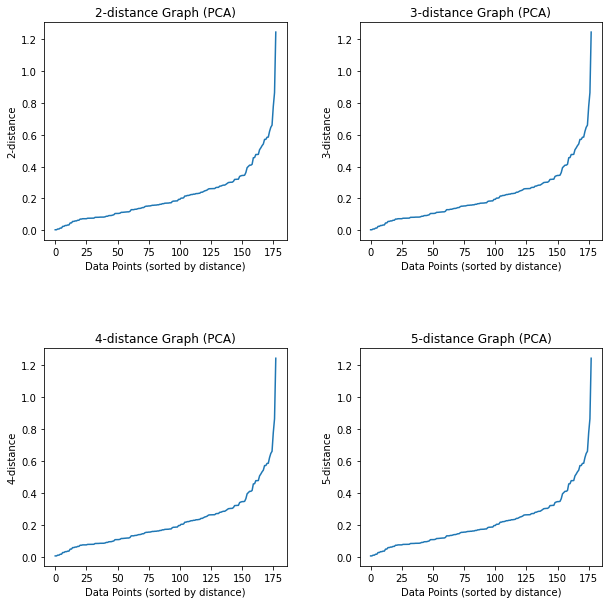

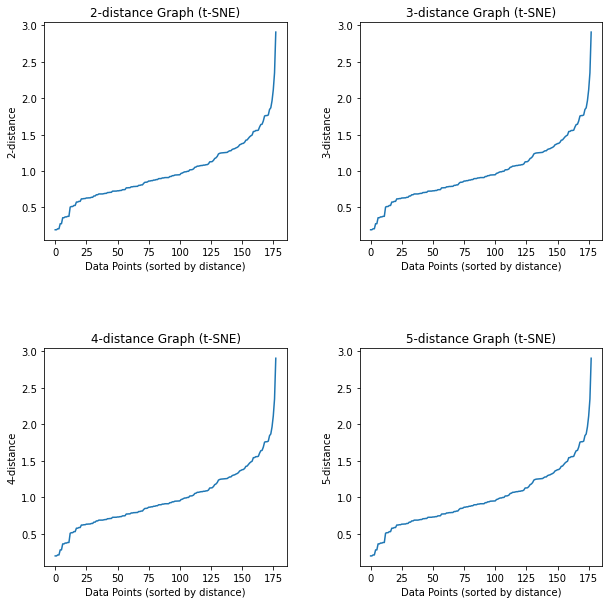

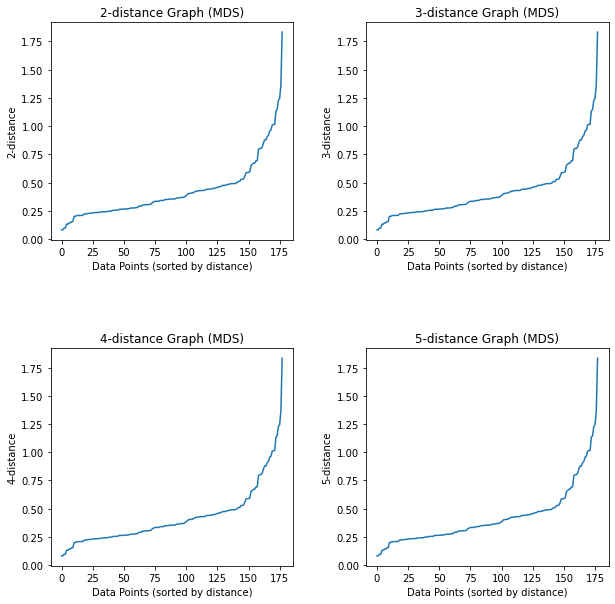

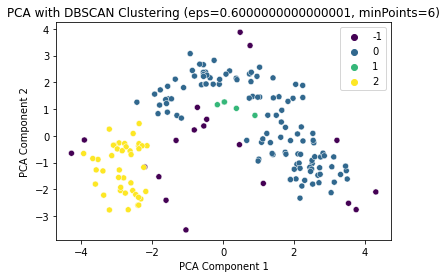

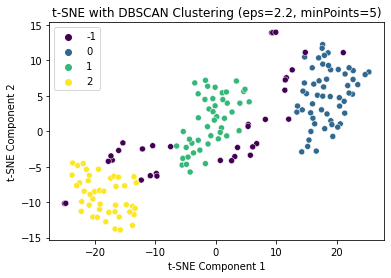

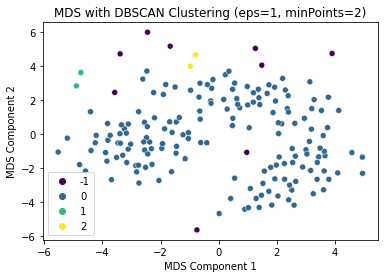

In [19]:
# Function to apply DBSCAN and plot the results for a given method
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import seaborn as sns

# Function to plot the k-distance graph
def plot_k_distance_graph(data, k, method_name):
    neigh = NearestNeighbors(n_neighbors=k)
    nbrs = neigh.fit(data)
    distances, indices = nbrs.kneighbors(data)
    distances = np.sort(distances, axis=0)[:, 1]

    plt.subplot(2, 2, k - 1)
    plt.plot(distances)
    plt.xlabel("Data Points (sorted by distance)")
    plt.ylabel(f"{k}-distance")
    plt.title(f"{k}-distance Graph ({method_name})")
# Function to apply DBSCAN and plot the results for a given method
def apply_dbscan(data, method_name, epsilon, min_points):
    dbscan = DBSCAN(eps=epsilon, min_samples=min_points)
    dbscan_labels = dbscan.fit_predict(data)

    plt.figure()
    cmap = plt.get_cmap("viridis", len(set(dbscan_labels)) - 1)
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=dbscan_labels, palette="viridis", legend="full")
    plt.xlabel(f"{method_name} Component 1")
    plt.ylabel(f"{method_name} Component 2")
    plt.title(f"{method_name} with DBSCAN Clustering (eps={epsilon}, minPoints={min_points})")
    plt.show()

# PCA
for method_name, data in zip(["PCA", "t-SNE", "MDS"], [principal_components[:, :2], tsne_results_20, mds_results]):
    plt.figure(figsize=(10, 10))
    for min_points in range(2, 6):
        plot_k_distance_graph(data, min_points, method_name)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    plt.show()


apply_dbscan(principal_components[:, :2], "PCA", epsilon=0.6000000000000001, min_points=6)


apply_dbscan(tsne_results_20, "t-SNE", epsilon=2.2, min_points=5)


apply_dbscan(mds_results, "MDS", epsilon=1, min_points=2)



## Using Tsne: 

48605


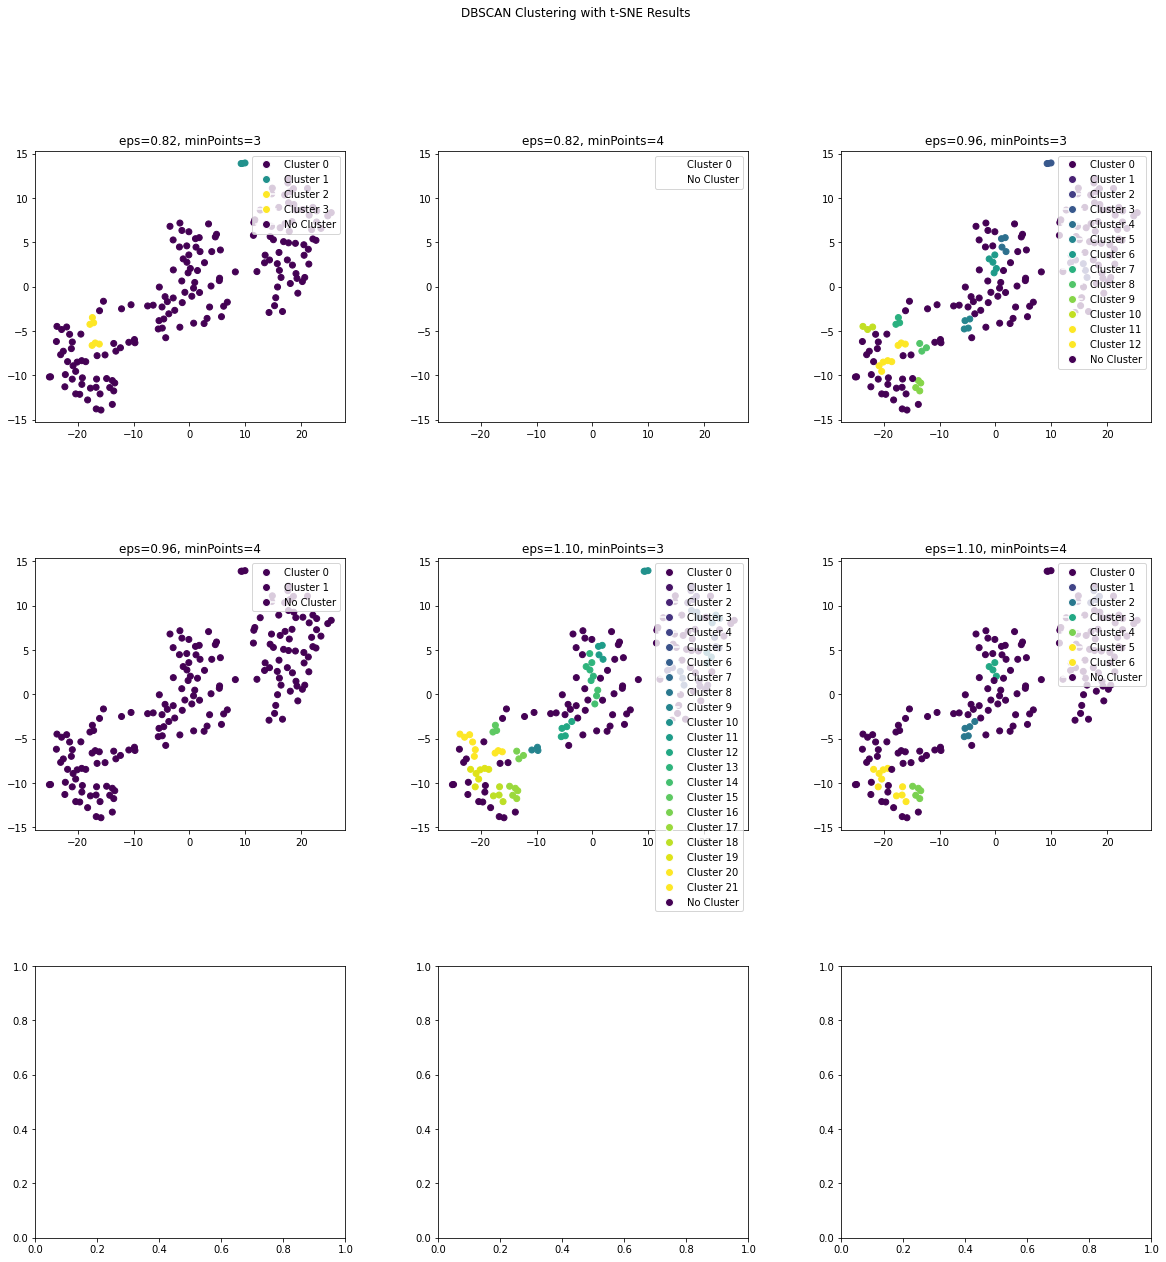

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import random

seed = random.randint(1, 100000)
print(seed)

# Define a range of epsilon and minPoints values to test
epsilons = np.linspace(.82, 1.1, 3)
min_points_list = np.arange(3, 5)

# Function to apply DBSCAN and plot the results for a given epsilon and minPoints
def apply_dbscan_subplot(data, epsilon, min_points, ax):
    dbscan = DBSCAN(eps=epsilon, min_samples=min_points)
    dbscan_labels = dbscan.fit_predict(data)
    cmap = plt.get_cmap("viridis", len(set(dbscan_labels)) - 1)
    scatter = ax.scatter(data[:, 0], data[:, 1], c=dbscan_labels, cmap=cmap)
    ax.set_title(f"eps={epsilon:.2f}, minPoints={min_points}")

    # Create legend
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Cluster ' + str(i),
                                  markerfacecolor=cmap(i), markersize=8) for i in range(len(set(dbscan_labels))) if i != -1]
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='No Cluster',
                                      markerfacecolor=cmap(-1), markersize=8))
    ax.legend(handles=legend_elements, loc='upper right')

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle("DBSCAN Clustering with t-SNE Results")

# Test each permutation of epsilons and minPoints and plot the results
for i, (epsilon, min_points) in enumerate(product(epsilons, min_points_list)):
    row, col = divmod(i, 3)
    apply_dbscan_subplot(tsne_results_20, epsilon, min_points, axes[row, col])

# Adjust subplot spacing and show the figure
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()



# Extra credit:
a) Given your answers to all of these questions taken together, how many different kinds of wine
do you think there are and how do they differ?

b) Is there anything of interest you learned about wines from exploring this dataset with
unsupervised machine learning method that is worth noting and not already covered in the questions above?